In [ ]:
#Create a directory named train,

# ! mkdir train

# Import Libraries:

In [1]:
import glob
from skimage.io import  imread, imshow
from skimage.transform import  resize, rescale
from skimage.color import rgb2gray
import numpy as np
from os import listdir, path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the Data

## Downloading Kaggle datasets directly into Colab

### Install the kaggle python library

In [ ]:
# install kaggle
! pip install -q kaggle

In [ ]:
# ! pip install kaggle

### Upload kaggle.json file

In [31]:
from google.colab import files

files.upload()

### create a kaggle folder

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


### copy the kaggle.json to folder create

In [ ]:
#copy the kaggle.json to folder create
! cp kaggle.json ~/.kaggle/

### permission for the json to act

In [ ]:
#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

### list all datasets in kaggle

In [ ]:
# to list all datasets in kaggle
! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                      5MB  2022-11-13 15:47:17           9042        269  1.0              
mattop/alcohol-consumption-per-capita-2016                      Alcohol Consumption Per Capita 2016                   4KB  2022-12-09 00:03:11            883         33  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                     3MB  2022-11-16 13:52:31           5809        128  1.0              
swaptr/fifa-world-cup-2022-match-data                       

### Download The Dataset

In [ ]:
# ! kaggle competitions download -c 'name-of-competition'
!kaggle datasets download -d balabaskar/tom-and-jerry-image-classification

tom-and-jerry-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


### Unzip the data there

In [ ]:
#unzip the data there,

! unzip tom-and-jerry-image-classification.zip -d tom-and-jerry-image-classification

Streaming output truncated to the last 5000 lines.
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2793.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2794.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2795.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2796.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2797.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2798.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2799.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2800.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/jerry/frame2801.jpg  
  inflating: tom-and-jerry-image-classification/tom_and_jerry/tom_a

## loading data

### loading data by os

In [ ]:
def load_imgs_from_directory(dir):

  all_imgs=[]
  all_labels=[]
  
  folders_names=listdir(dir)
  print(folders_names)

  for i in range( len ( folders_names)):
        imgs_list=listdir(path.join( dir, folders_names[i] ) )

        for img in imgs_list:

          img_path=path.join( dir, folders_names[i] , img)
          img_read=imread(img_path)
          img_resize= resize(img_read, (64,64), anti_aliasing=True)
          
          all_imgs.append(img_resize )
          all_labels.append(folders_names[i])

  return np.array(all_imgs), np.array(all_labels)

In [ ]:
dir="/content/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry"

img_images, lab_labels= load_imgs_from_directory(dir)

['jerry', 'tom_jerry_1', 'tom', 'tom_jerry_0']


In [ ]:
print( len(img_images), len(lab_labels) )

print("size of the training images",img_images.shape)

np.unique(lab_labels,return_counts=True)

5478 5478
size of the training images (5478, 64, 64, 3)


(array(['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1'], dtype='<U11'),
 array([1240, 1930, 1528,  780]))

In [ ]:
# dir="/content/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry"

# testing_images, testing_labels= load_imgs_from_directory(dir)

In [ ]:
# print( len(testing_images), len(testing_labels) )

# print("size of the training images",testing_images.shape)

# np.unique(testing_labels,return_counts=True)

label: jerry


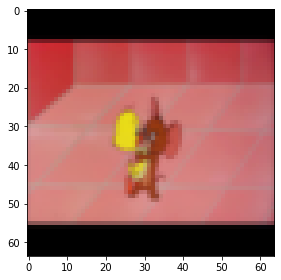

In [ ]:
imshow(img_images[400])

print('label:', lab_labels[400])

### loading data by glob

In [ ]:
import glob

In [ ]:
all_images=[]
all_labells=[]

for img_path in glob.glob("/content/tom-and-jerry-image-classification/tom_and_jerry/tom_and_jerry/*/*"):

  all_images.append(imread(img_path))
  all_labells.append(img_path.split('/')[-2])

jerry


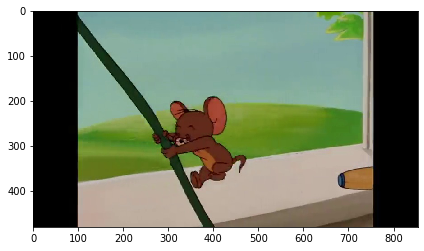

In [ ]:
print(all_labells[40])
imshow(all_images[40])

### Save the data as numpy array

In [ ]:
# images = open('img_images.npy', 'wb')
# np.savez_compressed(images, img_images)

# labels = open('lab_labels.npy', 'wb')
# np.savez_compressed(labels, lab_labels)

In [2]:
# loading them
loaded_images=np.load('/content/drive/MyDrive/Require files for computer vision/img_images.npy', mmap_mode='r')['arr_0']
loaded_labels=np.load('/content/drive/MyDrive/Require files for computer vision/lab_labels.npy', mmap_mode='r')['arr_0']

# split data to Training & Validation and Testing


Let's split into training images and test images.

## split data to Training and Testing

In [3]:
from sklearn.model_selection import train_test_split

X_train_all, X_test, y_train_all, y_test = train_test_split(loaded_images, loaded_labels, test_size=0.2,random_state=42, shuffle=True, stratify=loaded_labels)
print("shape of training data",X_train_all.shape)
print("shape of validation data",X_test.shape)

shape of training data (4382, 64, 64, 3)
shape of validation data (1096, 64, 64, 3)


In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [5]:
np.unique(y_train_all, return_counts=True)

(array(['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1'], dtype='<U11'),
 array([ 992, 1544, 1222,  624]))

## split data to Training and Validation

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size=0.2,random_state=42, shuffle=True, stratify=y_train_all)
print("shape of training data",X_train.shape)
print("shape of validation data",X_valid.shape)

shape of training data (3505, 64, 64, 3)
shape of validation data (877, 64, 64, 3)


In [7]:
np.unique(y_train, return_counts=True)

(array(['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1'], dtype='<U11'),
 array([ 794, 1235,  977,  499]))

# Preprocessing

## Mapping

In [8]:
mapping_ids={'jerry':0, 'tom':1, 'tom_jerry_0':2, 'tom_jerry_1':3}

mapping_ids['tom']

1

In [9]:
mapped_ytrain=[mapping_ids[label] for label in y_train]
mapped_yvalid=[mapping_ids[label] for label in y_valid]
mapped_ytest=[mapping_ids[label] for label in y_test]

In [10]:
np.unique(mapped_ytrain, return_counts=True)

(array([0, 1, 2, 3]), array([ 794, 1235,  977,  499]))

In [11]:
from tensorflow.keras.utils import to_categorical
y_train_k=to_categorical(mapped_ytrain, num_classes=5)
y_valid_k=to_categorical(mapped_yvalid, num_classes=5)
y_test_k=to_categorical(mapped_ytest, num_classes=5)

# Model Architecture

In [12]:
# to make this notebook's output stable across runs
import tensorflow as tf
def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed) 

In [13]:
reset_graph(seed=42)

from keras.applications import VGG16
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer, Dropout, BatchNormalization, Activation
from keras.regularizers import L1, L2, L1L2
 
vgg_model_CLASS = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

for layer in vgg_model_CLASS.layers:
    layer.trainable = False

# last layers output
y = vgg_model_CLASS.layers[6].output

# Block 3
y=BatchNormalization()(y)
y = Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv1')(y)
y=BatchNormalization()(y)
y = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(y)

#Block 4---> Top layer
y = Flatten(name='flatten')(y)
y = Dense(32, name='block4_dense1', kernel_regularizer='l1')(y) 
y=Dropout(0.1)(y)
y = Dense(5,activation='softmax')(y)

from keras.models import Model
vgg_modified = Model(inputs=vgg_model_CLASS.input, outputs=y)

58889256/58889256 [==============================] - 0s 0us/step


In [14]:
print(vgg_modified.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

# Model training

In [15]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss',mode='min',patience=3)
reset_graph(seed=9)

vgg_modified.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model_training = vgg_modified.fit(X_train, y_train_k, batch_size=16, epochs=150, verbose=1, validation_data=(X_valid, y_valid_k), shuffle=True)

Epoch 1/150
220/220 [==============================] - 11s 12ms/step - loss: 15.0709 - accuracy: 0.5412 - val_loss: 5.7834 - val_accuracy: 0.5849
Epoch 2/150
220/220 [==============================] - 2s 8ms/step - loss: 3.6873 - accuracy: 0.6197 - val_loss: 2.8194 - val_accuracy: 0.5200
Epoch 3/150
220/220 [==============================] - 2s 8ms/step - loss: 2.3510 - accuracy: 0.6582 - val_loss: 2.1539 - val_accuracy: 0.6750
Epoch 4/150
220/220 [==============================] - 2s 8ms/step - loss: 1.9583 - accuracy: 0.7195 - val_loss: 2.0092 - val_accuracy: 0.6545
Epoch 5/150
220/220 [==============================] - 2s 8ms/step - loss: 1.8738 - accuracy: 0.7629 - val_loss: 2.3962 - val_accuracy: 0.6545
Epoch 6/150
220/220 [==============================] - 2s 8ms/step - loss: 1.9470 - accuracy: 0.7780 - val_loss: 1.8877 - val_accuracy: 0.7366
Epoch 7/150
220/220 [==============================] - 2s 9ms/step - loss: 1.5077 - accuracy: 0.8362 - val_loss: 2.0002 - val_accuracy: 0.7

**History Visualization**

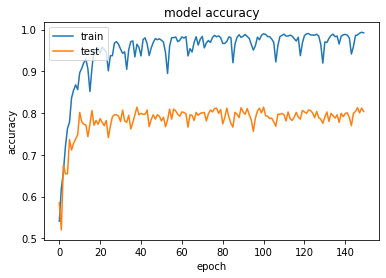

In [18]:
# summarize history for accuracy
plt.plot(model_training.history['accuracy'])
plt.plot(model_training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

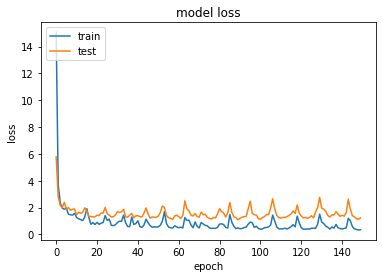

In [19]:
# summarize history for loss
plt.plot(model_training.history['loss'])
plt.plot(model_training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
#training
train_pred = vgg_modified.predict(X_train).argmax(axis=-1)
#validation
valid_pred = vgg_modified.predict(X_valid).argmax(axis=-1)
#testing
test_pred = vgg_modified.predict(X_test).argmax(axis=-1)

35/35 [==============================] - 0s 10ms/step


# Evaluation Metrics

In [21]:
from sklearn.metrics import classification_report

In [22]:
print("Classification Report of Validation data:\n\n",classification_report(np.array(mapped_ytrain),train_pred))

Classification Report of Validation data:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99       794
           1       1.00      1.00      1.00      1235
           2       0.99      1.00      0.99       977
           3       0.99      1.00      0.99       499

    accuracy                           1.00      3505
   macro avg       0.99      0.99      0.99      3505
weighted avg       1.00      1.00      1.00      3505



In [23]:
print("Classification Report of Validation data:\n\n",classification_report(np.array(mapped_yvalid),valid_pred))

Classification Report of Validation data:

               precision    recall  f1-score   support

           0       0.78      0.75      0.76       198
           1       0.89      0.83      0.86       309
           2       0.72      0.83      0.77       245
           3       0.82      0.77      0.79       125

    accuracy                           0.80       877
   macro avg       0.80      0.79      0.80       877
weighted avg       0.81      0.80      0.80       877



In [24]:
print("Classification Report of testing data:\n\n",classification_report(np.array(mapped_ytest),test_pred))

Classification Report of testing data:

               precision    recall  f1-score   support

           0       0.76      0.71      0.73       248
           1       0.84      0.84      0.84       386
           2       0.70      0.78      0.74       306
           3       0.79      0.69      0.73       156

    accuracy                           0.77      1096
   macro avg       0.77      0.76      0.76      1096
weighted avg       0.78      0.77      0.77      1096

